#Tarea 2
### Métodos numéricos para ecuaciones diferenciales
Nataly Phawllyn Neira Parra Cod: 614212782

###Para graficar

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

def graf_solucion_continua(yt,a,b,titulo):
  """
   esta funcion grafica la  función exacta y continua dada
   ENTRADAS:
    yt: función de t que queremos  graficar
    a,b: límite inferior  y  superior del dominio de la función
  """
  resol = 200
  tn = np.linspace(a,b,resol + 1)
  yn = np.zeros(resol+1)
  for n in range(resol+1):
    yn[n]=yt( tn[n] )
  sns.lineplot(x=tn, y=yn, marker="",label='exacta',color='blue')
  plt.title('Aproximación PVI  {}'.format(titulo))
  plt.xlabel('t')
  plt.ylabel('y')
  plt.grid(True, linestyle='--')
  plt.legend()

def graf_solucion_discreta(th,yh,labelf,colores):
  """
  Esta funcipon grafica los puntos discretos de la solución aproximada
   ENTRADAS:
    th: arreglo o lista de datos de los  valores t usados
    yh: arreglo o lista de datos  encontrados
    labelf: nombre de la serie
    colores: color de la serie
    NOTA:  yh, th con longitud N+1 deben incluir valor inicial y0 y tiempo inicial t0
  """

  sns.lineplot(x=th, y=yh, marker="*", label=labelf, color=colores)

#Métodos

##Euler y Trapecio Explicito

In [2]:
def euler(t0 , y0, h, N, funcion):
  """
    Esta función  usa el Método de Euler para integrar Problemas de valor inicial PVI
  ENTRADAS:
     t0: tiempo inicial
     y0: valor inicial
     funcion : función de tasa de cambio
     h : longitud de paso
     N : cantidad de pasos
  SALIDAS:
     th: lista de tiempos para la solución discreta
     yh: solución discreta en todos los pasos de tiempo
"""

  y=[]
  t=[]
  y.append(y0)
  t.append(t0)
  for  n in range(N):
    y1=y[n]+(h*funcion(t[n],y[n]))
    y.append(y1)
    t.append(t[n]+h)
  return t,y



def trapecio_expl(t0 , y0, h, N, funcion):
  """
  esta funcion usa el  Método explícito del trapecio para integrar PVI
   ENTRADAS
     t0: tiempo inicial
     y0: valor inicial
     funcion : función de tasa de cambio
     h : longitud de paso
     N : cantidad de pasos
  SALIDAS
     th: lista de tiempos para la solución discreta
     yh: solución discreta en todos los pasos de tiempo
"""

  y=[]
  t=[]
  y.append(y0)
  t.append(t0)
  for n in range(N):
    t.append(t[n]+h)
    w1= y[n]+(h*funcion(t[n],y[n]))                                              # etapa 1: mediante Euler aproximo el valor en el siguiente paso
    w2= yh[n] + 0.5*h*(funcion(t[n],y[n]) + f(t[n+1],w1))                      # etapa 2: aplico fórmula de integración del trapecio
    y.append(w2)


  return t,y

## Taylor de segundo orden y  punto medio (explícito),

In [3]:
def taylor(t0 , y0, h, N, funcion):
  """
  Esta función  implementa  el Método de Taylor para solución de PVI
  ENTRADAS
    t0: tiempo inicial
     y0: valor inicial
     h : longitud de paso
     N : cantidad de pasos
    funcion : función de tasa de cambio
  SALIDAS
      t : lista de tiempos para la solución discreta
      y : solución discreta en todos los pasos de tiempo
  """
  y = []
  t = []
  y.append(y0)
  t.append(t0)
  for n in range(N):
    t.append(t[n]+h)
    w1 = y[n] + h * funcion(t[n], y[n]) + (h**2) / 2 * funcion(t[n], y[n])
    y.append(w1)
  return t,y

def punto_medio_explicito(t0 , y0, h, N, funcion):
    """
    Esta función implementa el Método de Punto Medio para solución de PVI
    ENTRADAS
        t0: tiempo inicial
        y0: valor inicial
        h : longitud de paso
        N : cantidad de pasos
        funcion : función de tasa de cambio
    SALIDAS
        t : lista de tiempos para la solución discreta
        y : solución discreta en todos los pasos de tiempo
    """
    y = []
    t = []
    y.append(y0)
    t.append(t0)
    for n in range(N):
        t.append(t[n] + h)
        k1 = funcion(t[n], y[n])
        k2 = funcion((t[n] + t[n+1]) / 2, y[n] + 1/2 * h * k1)
        y.append(y[n] + h * k2)
    return t, y


# Ejemplos

In [4]:
# EJEMPLO 1
# y' = -t*y,   y(0) = 1
def funcion_tasa_1(t,y):
  return -t*y

def sol_exacta_1(t):
  return np.exp(-t**2 / 2.0)


# EJEMPLO 2
# y' = 2t - y,   y(0) = pi
def funcion_tasa_2(t,y):
  return 2*t-y

def sol_exacta_2(t):
  return 0


# EJEMPLO 3
# y' = r*y,    y(0)=500, donde r = ln(1.15)/3
def funcion_tasa_3(t,y):
  r = np.log(1.15)/3.0
  return r*y

def sol_exacta_3(t):
  r = np.log(1.15)/3.0
  return 500*np.exp(r*t)

In [5]:
def ejemplo(caso,N):
    """
    Elijes  el ejemplo a ejecutarse  y se  asignan los parametros
    ENTRADA
      caso:  numero del ejemplo a graficar
      N:  numero de  iteraciones
    SALIDA
       t0: tiempo inicial
        y0: valor inicial
        h : longitud de paso
        N : cantidad de pasos
        funcion : función de tasa de cambio
        yt :  arreglo con los  valores de la función exacta

    """
    if caso == 1:           # para el ejemplo 1
        f = funcion_tasa_1
        yt = sol_exacta_1
        t0 = 0.0
        y0 = 1
        tfin = 5.0

    elif caso == 2:          # para el ejemplo 2
        f = funcion_tasa_2
        yt = sol_exacta_2
        t0 = 0.0
        y0 = np.pi
        tfin = 5.0

    elif caso == 3:          # para el ejemplo 3
        f = funcion_tasa_3
        yt = sol_exacta_3
        t0 = 0.0
        y0 = 500
        tfin = 30.0

    h = (tfin-t0)/N
    return t0, y0, h, N , f, yt

def error(real, aprox):
  error=[]
  for i in range(len(real)):
    error_relativo = np.abs((real[i]- aprox[i]))
    error.append(error_relativo)
  return error

# Pruebas

Ejemplo 1

In [6]:
t0, y0, h, N, funcion, yt=ejemplo(caso=1,N=50)  # elección del ejemplo, (CASO) y numero de iteraciones  (N)

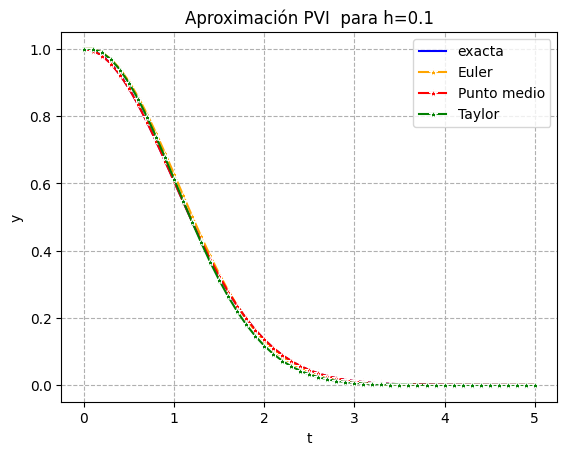

In [7]:
plt.figure(1)

graf_solucion_continua(yt,t0,t0+N*h,"para h={}".format(h))

th,y_e = euler(t0 , y0, h, N, funcion)
graf_solucion_discreta(th,y_e,"Euler","orange")

th,y_p = punto_medio_explicito(t0 , y0, h, N, funcion)
graf_solucion_discreta(th,y_p,"Punto medio","red")

th,y_t = taylor(t0 , y0, h, N, funcion)
graf_solucion_discreta(th,y_t,"Taylor","green")

plt.show()

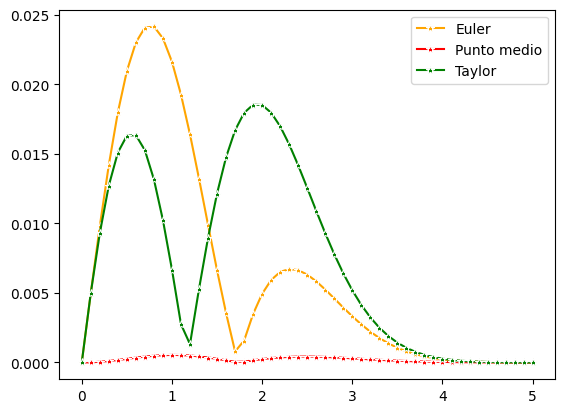

In [8]:
yn = np.zeros(N+1)
for n in range(N+1):
    yn[n]=yt( th[n] )

plt.figure(2)

error_e = error(yn, y_e)
graf_solucion_discreta(th,error_e,"Euler","orange")

error_p = error(yn, y_p)
graf_solucion_discreta(th,error_p,"Punto medio","red")

error_t = error(yn, y_t)
graf_solucion_discreta(th,error_t,"Taylor","green")

plt.show()


Ejemplo 2

In [9]:
t0, y0, h, N, funcion, yt=ejemplo(caso=2,N=50)  # elección del ejemplo, (CASO) y numero de iteraciones  (N)

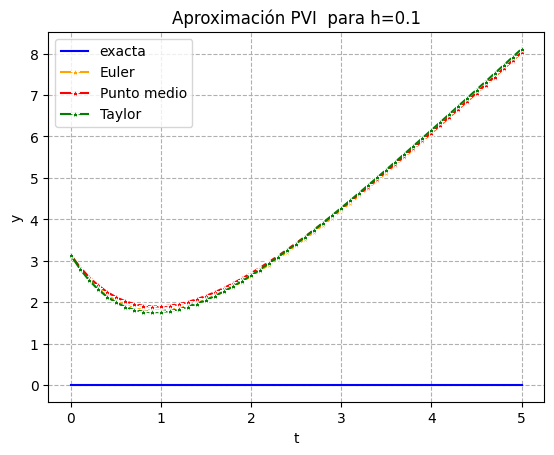

In [10]:
plt.figure(3)

graf_solucion_continua(yt,t0,t0+N*h,"para h={}".format(h))

th,y_e = euler(t0 , y0, h, N, funcion)
graf_solucion_discreta(th,y_e,"Euler","orange")

th,y_p = punto_medio_explicito(t0 , y0, h, N, funcion)
graf_solucion_discreta(th,y_p,"Punto medio","red")

th,y_t = taylor(t0 , y0, h, N, funcion)
graf_solucion_discreta(th,y_t,"Taylor","green")

plt.show()

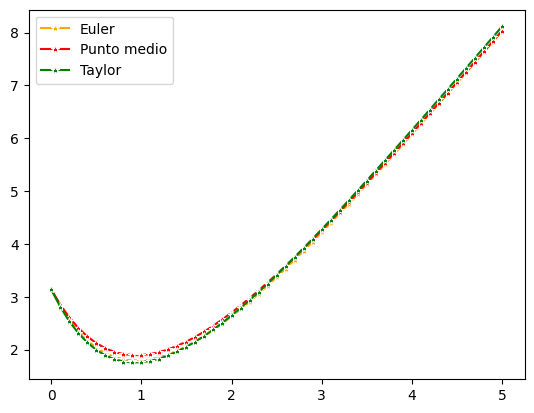

In [11]:
yn = np.zeros(N+1)
for n in range(N+1):
    yn[n]=yt( th[n] )

plt.figure(4)

error_e = error(yn, y_e)
graf_solucion_discreta(th,error_e,"Euler","orange")

error_p = error(yn, y_p)
graf_solucion_discreta(th,error_p,"Punto medio","red")

error_t = error(yn, y_t)
graf_solucion_discreta(th,error_t,"Taylor","green")

plt.show()


Ejemplo 3

In [12]:
t0, y0, h, N, funcion, yt=ejemplo(caso=3,N=50)  # elección del ejemplo, (CASO) y numero de iteraciones  (N)

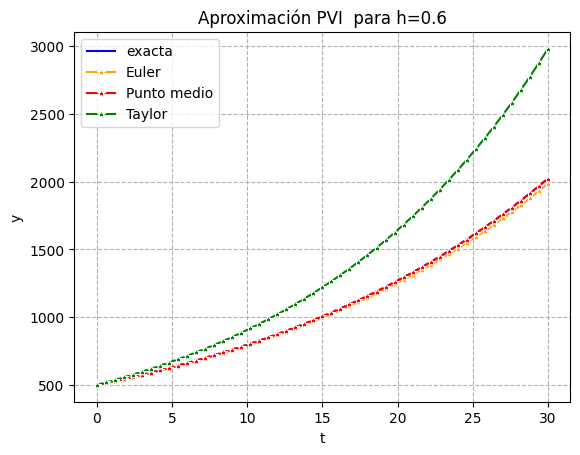

In [13]:
plt.figure(5)

graf_solucion_continua(yt,t0,t0+N*h,"para h={}".format(h))

th,y_e = euler(t0 , y0, h, N, funcion)
graf_solucion_discreta(th,y_e,"Euler","orange")

th,y_p = punto_medio_explicito(t0 , y0, h, N, funcion)
graf_solucion_discreta(th,y_p,"Punto medio","red")

th,y_t = taylor(t0 , y0, h, N, funcion)
graf_solucion_discreta(th,y_t,"Taylor","green")

plt.show()

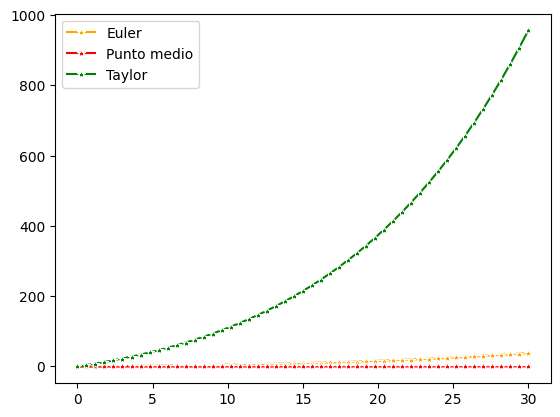

In [14]:
yn = np.zeros(N+1)
for n in range(N+1):
    yn[n]=yt( th[n] )

plt.figure(6)

error_e = error(yn, y_e)
graf_solucion_discreta(th,error_e,"Euler","orange")

error_p = error(yn, y_p)
graf_solucion_discreta(th,error_p,"Punto medio","red")

error_t = error(yn, y_t)
graf_solucion_discreta(th,error_t,"Taylor","green")

plt.show()
